# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"




# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | al jawf
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | lubang
Processing Record 10 of Set 1 | savave village
City not found. Skipping...
Processing Record 11 of Set 1 | karratha
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | kununurra
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | hadibu
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-0.74,92,100,1.75,CL,1690410740
1,vorgashor,67.5833,63.9500,13.80,94,100,2.88,RU,1690410755
2,isafjordur,66.0755,-23.1240,7.18,83,79,5.38,IS,1690410795
3,al jawf,29.5000,38.7500,29.82,19,8,3.52,SA,1690410880
4,tiksi,71.6872,128.8694,8.20,67,41,1.53,RU,1690410740


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-0.74,92,100,1.75,CL,1690410740
1,vorgashor,67.5833,63.9500,13.80,94,100,2.88,RU,1690410755
2,isafjordur,66.0755,-23.1240,7.18,83,79,5.38,IS,1690410795
3,al jawf,29.5000,38.7500,29.82,19,8,3.52,SA,1690410880
4,tiksi,71.6872,128.8694,8.20,67,41,1.53,RU,1690410740


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

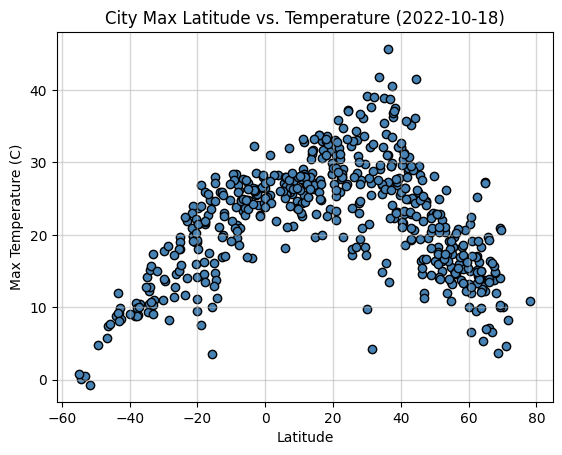

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolor="steelblue",edgecolor = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",linewidth=1,alpha= 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

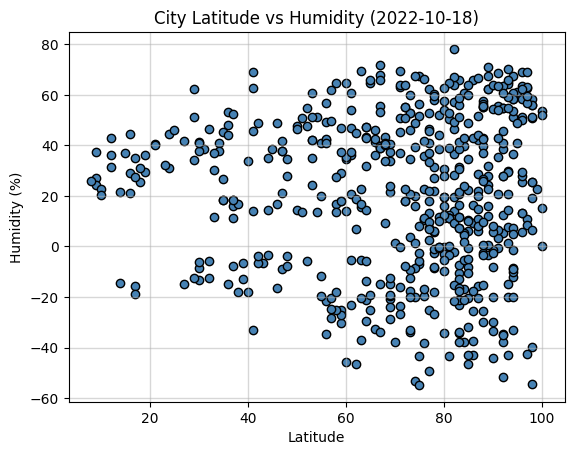

In [16]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"],facecolor="steelblue",edgecolor = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-',linewidth=1,alpha=0.5)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

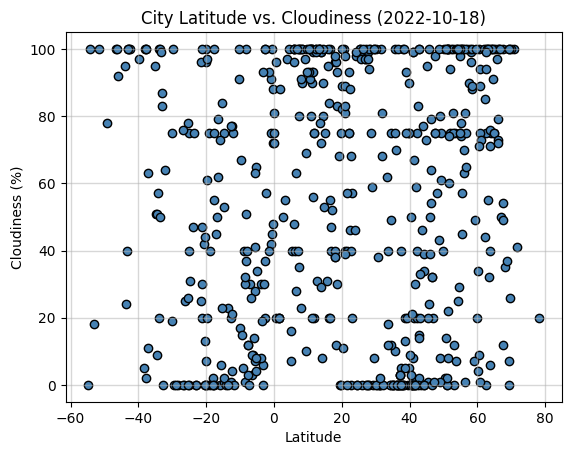

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolor="steelblue",edgecolor = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-',linewidth=1,alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

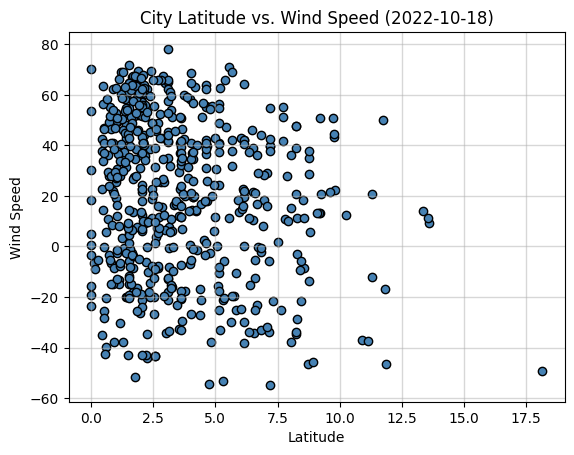

In [22]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Wind Speed"],city_data_df["Lat"],facecolor="steelblue",edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(linestyle='-',linewidth=1,alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linReg(x,y,coords):
    r = st.pearsonr(x,y)
    print(f"The r-value is: {r[0]}")
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    regressV = x * slope + intercept
    lineEq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
    plt.plot(x,regressV,"r-")
    plt.annotate(lineEq,coords,fontsize=12,color="red")
    plt.scatter(x,y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorgashor,67.5833,63.9500,13.80,94,100,2.88,RU,1690410755
2,isafjordur,66.0755,-23.1240,7.18,83,79,5.38,IS,1690410795
3,al jawf,29.5000,38.7500,29.82,19,8,3.52,SA,1690410880
4,tiksi,71.6872,128.8694,8.20,67,41,1.53,RU,1690410740
6,bethel,41.3712,-73.4140,29.74,66,20,3.09,US,1690410735


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-0.74,92,100,1.75,CL,1690410740
5,grytviken,-54.2811,-36.5092,0.11,98,100,4.74,GS,1690410743
9,karratha,-20.7377,116.8463,19.02,69,42,3.61,AU,1690410910
11,port lincoln,-34.7333,135.8667,14.22,56,51,8.23,AU,1690410758
12,papatowai,-46.5619,169.4708,5.69,85,100,11.86,NZ,1690410765


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.03654275349527379


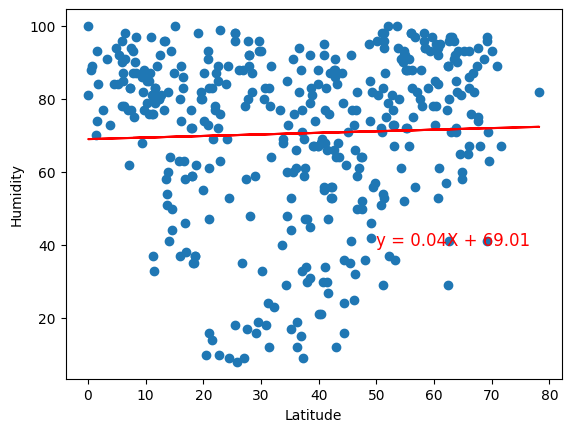

In [33]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linReg(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Humidity"],(50,40))

The r-value is: 0.8406643736759402


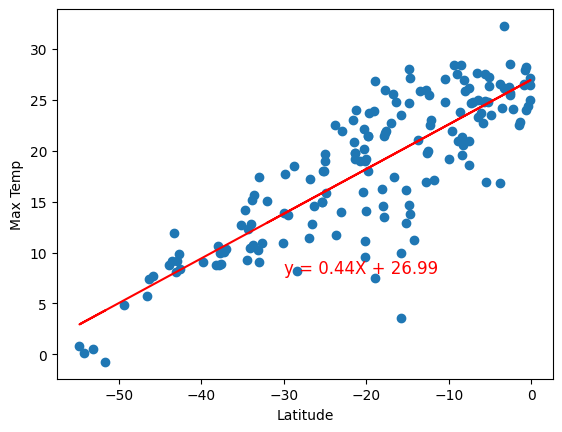

In [35]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linReg(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Max Temp"],(-30,8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03654275349527379


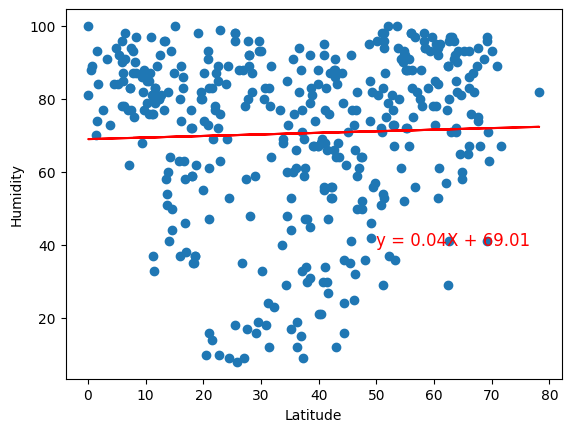

In [36]:
# Northern Hemisphere
# YOUR CODE HERE
linReg(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Humidity"],(50,40))

The r-value is: -0.1830860020075638


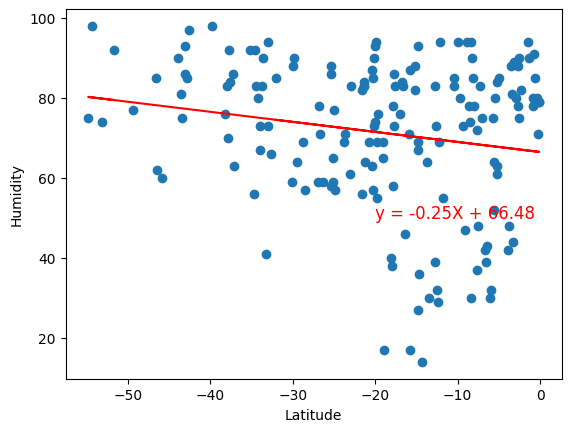

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
linReg(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Humidity"],(-20,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.051007966477786076


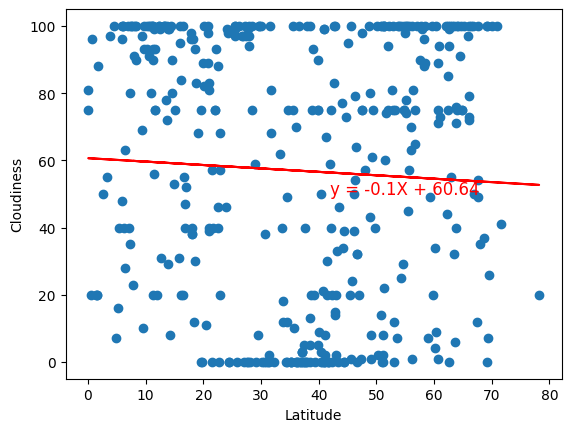

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
linReg(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"],(42,50))

The r-value is: -0.227947076006799


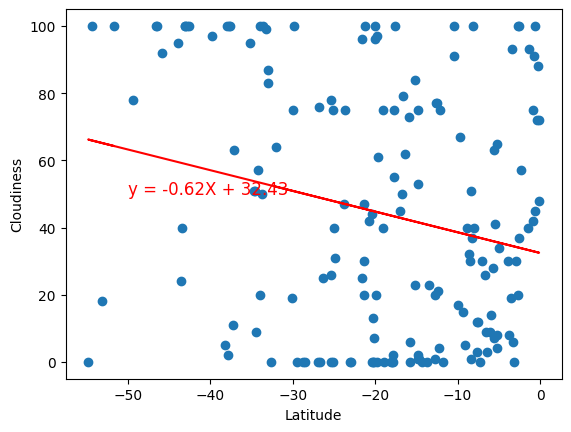

In [40]:
# Southern Hemisphere
# YOUR CODE HERE
linReg(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50,50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.20634047282253867


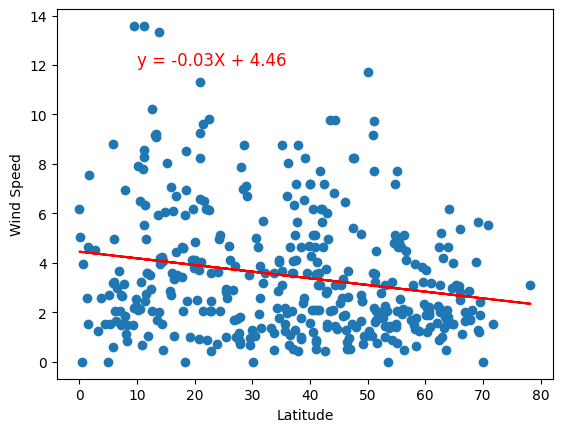

In [41]:
# Northern Hemisphere
# YOUR CODE HERE
linReg(northern_hemi_df["Lat"].rename("Latitude"),northern_hemi_df["Wind Speed"],(10,12))

The r-value is: -0.2742027090008514


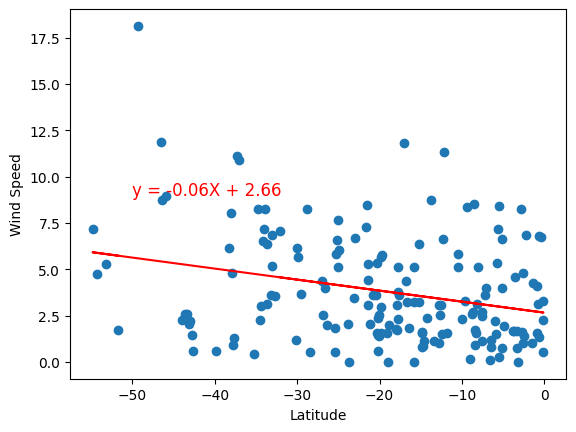

In [42]:
# Southern Hemisphere
# YOUR CODE HERE
linReg(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"],(-50,9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE